In [2]:
#wczytaj plik kc_house_data.csv
import pandas as pd
import numpy as np

df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
#za pomocą polecenia drop usuń co najmniej kolumny "id" oraz "date"

df = df.drop(['id', 'date'], axis = 1)

In [28]:
# 1. do zmiennej y przypisz zawartość kolumny price
y = df['price']
# 2. do zmiennej X przypisz zawartość wszystkich kolumn poza price, skorzystaj z polecenia drop
X = df.drop(['price'], axis = 1)

In [29]:
#podziel dana na treningowe i testowe, przyjmij train_size = 0.8
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=16)

In [30]:
#zbuduj model, wytrenuj go, nastepnie wyświetl mse i mae

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(mse, mae)

38586561438.34155 126226.50102009135


In [32]:
def regression(df, n_features):
    y =df[["price"]]
    X = df.drop(["price"], axis= 1)
    X = df.iloc[:, :n_features+1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=1)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return (mse, mae)

In [33]:
mse, mae = [], []
for i in range(1,19):
    mse.append(regression(df, i)[0])
    mae.append(regression(df, i)[1])
    

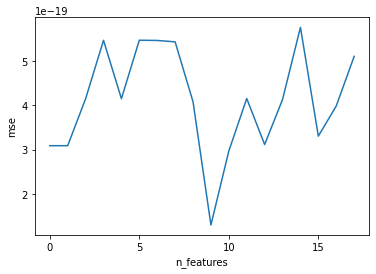

In [34]:
import matplotlib.pyplot as plt
plt.plot(mse)
plt.xlabel('n_features')
plt.ylabel('mse')
plt.locator_params(integer=True)

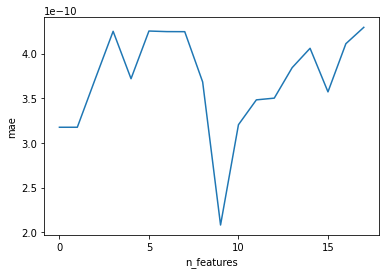

In [35]:
plt.plot(mae)
plt.xlabel('n_features')
plt.ylabel('mae')
plt.locator_params(integer=True)